In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits

# Elbow method vs MNIST

In [3]:
digits = load_digits()
# print(digits.DESCR)

print("digits.keys() =", digits.keys())
print("digits.images.shape =", digits.images.shape)
print("digits.data.shape =", digits.data.shape)
print("digits.target.shape =", digits.target.shape)

digits.keys() = dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
digits.images.shape = (1797, 8, 8)
digits.data.shape = (1797, 64)
digits.target.shape = (1797,)


In [4]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [5]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

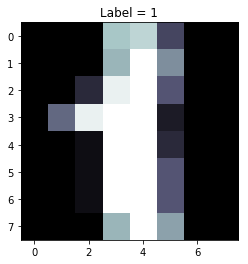

In [6]:
plt.imshow(digits.images[1], cmap=plt.cm.bone)
plt.title("Label = "+str(digits.target[1]))
plt.show()

## Zad.

Wykonaj algorytm k-means na danych iris z grupami $k=1,\ldots,50$ i narysuj wykres zależności miar

```python
metrics.homogeneity_score
metrics.completeness_score
metrics.v_measure_score
metrics.adjusted_rand_score
metrics.adjusted_mutual_info_score
```

od ilośi klastrów.

In [40]:
X = digits.data
y = digits.target

SSE_array = [None]
homogeneity_score_array = [None]
completeness_score_array = [None]
v_measure_score_array = [None]
adjusted_rand_score_array = [None]
adjusted_mutual_info_score_array = [None]
silhouette_score_array = [None]
    
for i in range(1,51):
    km = KMeans(n_clusters=i, n_init=10)
    y_km = km.fit_predict(X)
    SSE_array.append(km.inertia_)
    
    homogeneity_score_array.append(metrics.homogeneity_score(y, y_km))
    completeness_score_array.append(metrics.completeness_score(y, y_km))
    v_measure_score_array.append(metrics.v_measure_score(y, y_km))
    adjusted_rand_score_array.append(metrics.adjusted_rand_score(y, y_km))
    adjusted_mutual_info_score_array.append(metrics.adjusted_mutual_info_score(y,  y_km))
    


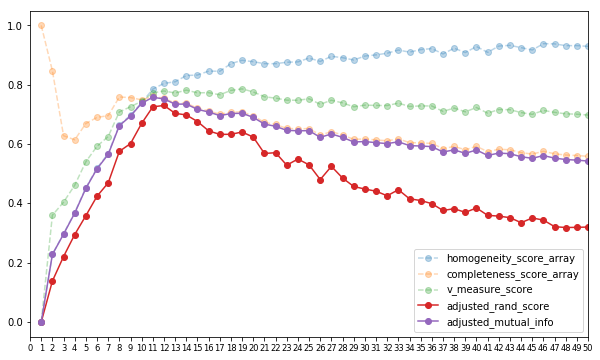

In [41]:
t=range(0,51)
plt.figure(figsize=(10,6));
# plt.plot(SSE_array)
plt.plot( homogeneity_score_array, "o--", label="homogeneity_score_array", alpha = 0.3)
plt.plot( completeness_score_array, "o--", label="completeness_score_array", alpha = 0.3)
plt.plot( v_measure_score_array, "o--", label="v_measure_score", alpha = 0.3)
plt.plot( adjusted_rand_score_array, "o-", label="adjusted_rand_score")
plt.plot( adjusted_mutual_info_score_array, "o-", label="adjusted_mutual_info")
plt.xlim(0,21)
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

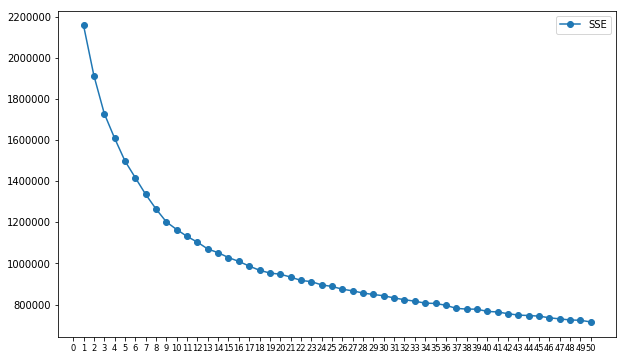

In [46]:
plt.figure(figsize=(10,6));
plt.plot(SSE_array, "o-", label="SSE")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

# Zad
wykonaj algorytm dla $k=10$ i wypisz:
  * wszystkie miary dopasowania
  * crosstab

In [9]:
km = KMeans(n_clusters=10, n_init=10)
y_km = km.fit_predict(X)

In [10]:
pd.crosstab(y,y_km)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,0,177,0,1,0,0,0,0,0,0
1,0,0,0,0,55,2,1,24,99,1
2,4,1,2,0,2,0,0,147,8,13
3,7,0,13,0,0,0,2,0,7,154
4,9,0,0,164,5,0,0,0,3,0
5,0,0,43,2,0,1,136,0,0,0
6,0,1,0,0,1,177,0,0,2,0
7,177,0,0,0,0,0,0,0,2,0
8,5,0,53,0,5,2,4,3,100,2


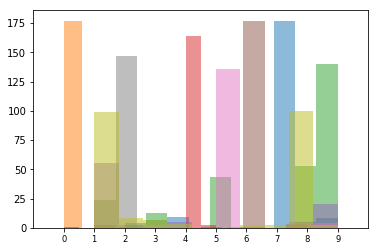

In [36]:
for i in range(9):
    plt.hist(y[y_km==i],alpha=0.5)
    
plt.xlim(-1,10)
plt.xticks(np.arange(0,10), np.arange(0,10), size='small')    
plt.show()    

In [37]:
print(metrics.adjusted_rand_score(y, y_km))
print(metrics.adjusted_mutual_info_score(y,  y_km))

0.6688241589225608
0.7402813848312562
